<h1><center> Modelos de Box Jenkins </center></h1>

El Banco Central de Reserva del Perú (BCRP) registra diversos indicadores de importancia para el país. Uno de ellos es el monto, en millones de soles (S/) de los ingresos corrientes anuales del gobierno central por el Impuesto General a las Ventas (IGV) 

Considere los datos correspondientes a los años 1990 al 2018, del archivo **Anuales-20191102-172135.xlsx**

Fuente: https://estadisticas.bcrp.gob.pe/estadisticas/series/anuales/resultados/PM10093FA/html

In [14]:
import pandas as pd
datos = pd.read_excel('Anuales-20191102-172135.xlsx', skiprows = 22, header = None, names = ['Año','IGV'])
datos.head()

,Año,IGV
0,1990,109.163611
1,1991,765.103027
2,1992,1704.136863
3,1993,3538.970705
4,1994,5960.954142


importar la libreria panda , se esta usando la funcion "read_excel", skiprows= ignora la sprimeras 22 filas , header=none no
considera las cabeceras, names para poner nombre a las columnas.

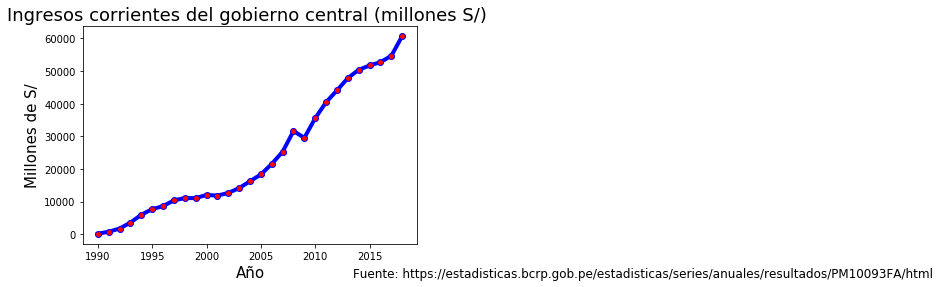

In [15]:
import matplotlib.pyplot as plt
plt.plot(datos.Año, datos.IGV, 
         label='Serie simulada según un modelo AR(1)',
         linewidth = 4,
         color     = 'blue',
         marker    = 'o', 
         markerfacecolor = 'red');
plt.xlabel('Año', fontsize = 15)
plt.ylabel('Millones de S/', fontsize = 15)
plt.title('Ingresos corrientes del gobierno central (millones S/) ', fontsize = 18)
plt.figtext(0.75, 0.01, 'Fuente: https://estadisticas.bcrp.gob.pe/estadisticas/series/anuales/resultados/PM10093FA/html', fontsize = 12);

# 1. Identificación

In [19]:
from statsmodels.tsa.api import kpss, adfuller
kpss(datos.IGV, regression='c')[1]
alfa=0.10  

0.06826672446138318

In [ ]:
la serie no es estacionaria

In [10]:
#conda install -c bashtage arch

In [42]:
from arch.unitroot import KPSS, ADF, PhillipsPerron
KPSS(datos.IGV)

Test Statistic,0.795
P-value,0.008
Lags,3


In [43]:
adfuller(datos.IGV)[1]


0.998757072820105

In [44]:
ADF(datos.IGV)

Test Statistic,2.070
P-value,0.999
Lags,0


In [45]:
PhillipsPerron(datos.IGV)

Test Statistic,2.517
P-value,0.999
Lags,9


In [31]:
kpss(datos.IGV.diff()[1:], regression='c')
#diff es para diferenciar de manera simple una vez ,[1:] porque se omite un dato, se pierde el primero o
#si no funciona la prueba

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.317590831899216,
 0.1,
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [46]:
KPSS(datos.IGV.diff()[1:])

Test Statistic,0.516
P-value,0.036
Lags,2


In [47]:
adfuller(datos.IGV.diff()[1:])[1]

0.0005457773311514132

In [48]:
ADF(datos.IGV.diff()[1:])

Test Statistic,-4.248
P-value,0.001
Lags,0


In [35]:
PhillipsPerron(datos.IGV.diff()[1:])

Test Statistic,-4.689
P-value,0.000
Lags,9


con una diferenciacion logramos q la serie se vuelva estacionaria

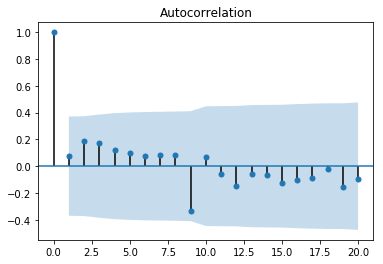

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(datos.IGV.diff()[1:], lags = 20);

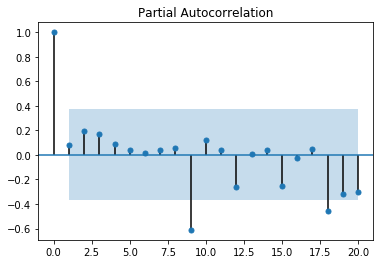

In [51]:
plot_pacf(datos.IGV.diff()[1:], lags = 20);

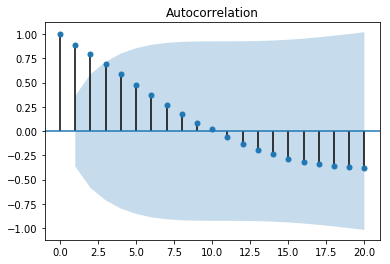

In [52]:
#mio
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(datos.IGV, lags = 20);

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


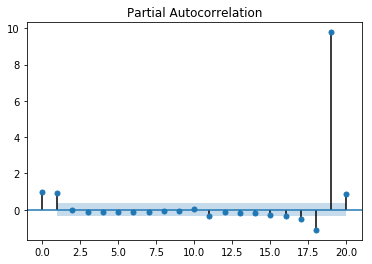

In [53]:
plot_pacf(datos.IGV, lags = 20);

las dos graficas tienen comportamiento de ruido blanco. Et~N(0, variancia constante)

# 2. Modelamiento

In [54]:
from statsmodels.tsa.arima_model import ARIMA
model  = ARIMA(datos.IGV, order=(0,1,0))  # P=0 , d=1  , q=0 
ajuste = model.fit(disp=0)
ajuste.summary()
#por el comportamiento de ruido blanco

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.IGV   No. Observations:                   28
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -251.645
Method:                           css   S.D. of innovations           1936.037
Date:                Mon, 04 Nov 2019   AIC                            507.291
Time:                        17:46:54   BIC                            509.955
Sample:                             1   HQIC                           508.105
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2162.7473    365.877      5.911      0.000    1445.642    2879.852
==============================================================================
"""

In [55]:
model2  = ARIMA(datos.IGV, order=(1,1,0))
ajuste2 = model2.fit(disp=0)
ajuste2.summary()
#esta jugando con p,d,q

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.IGV   No. Observations:                   28
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -251.547
Method:                       css-mle   S.D. of innovations           1928.987
Date:                Mon, 04 Nov 2019   AIC                            509.095
Time:                        17:47:42   BIC                            513.091
Sample:                             1   HQIC                           510.316
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2171.0483    399.526      5.434      0.000    1387.992    2954.104
ar.L1.D.IGV     0.0896      0.202      0.444      0.661      -0.306       0.485
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           11.1631           +0.0000j           11.1631            0.0000
-----------------------------------------------------------------------------
"""

In [56]:
model3  = ARIMA(datos.IGV, order=(0,1,1))
ajuste3 = model3.fit(disp=0)
ajuste3.summary()
#esta jugando con p,d,q

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.IGV   No. Observations:                   28
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -251.576
Method:                       css-mle   S.D. of innovations           1931.065
Date:                Mon, 04 Nov 2019   AIC                            509.151
Time:                        17:52:25   BIC                            513.148
Sample:                             1   HQIC                           510.373
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2167.8773    387.905      5.589      0.000    1407.597    2928.157
ma.L1.D.IGV     0.0644      0.173      0.372      0.713      -0.275       0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -15.5274           +0.0000j           15.5274            0.5000
-----------------------------------------------------------------------------
"""

# 3. Diagnóstico

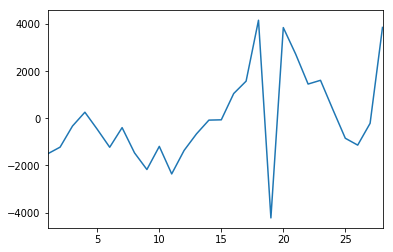

In [69]:
residuales  = ajuste.resid
residuales.plot()

In [70]:
from scipy.stats import ttest_1samp
_,pv = ttest_1samp(residuales, 0)
pv
#Ho: la media de los errores es igual  o.

1.0

In [71]:
from scipy.stats import shapiro
_, pv = shapiro(residuales)
pv

0.1127031072974205

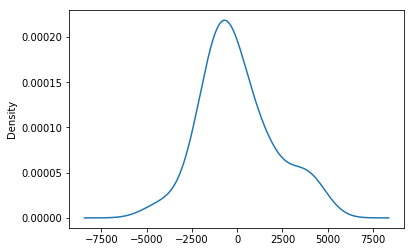

In [72]:
residuales.plot(kind='kde')

hay una pequeña asimetria en la cola derecha

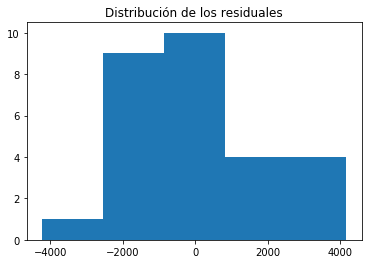

In [76]:
plt.hist(residuales, bins = 5)
plt.title('Distribución de los residuales');

los histogramas, bins=la cantidad de intervalos o barras

In [62]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuales)

1.6804516965587875

no impolica q habria independencia

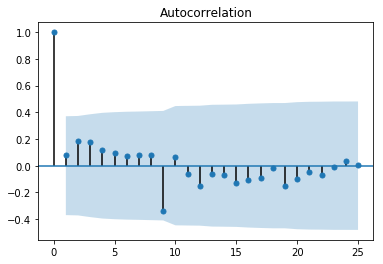

In [63]:
plot_acf(residuales, lags = 25);

esto indica independencia de errores


In [90]:
residuales.mean() #ME

-1.624097681737372e-13

In [91]:
residuales.abs().mean() #MAE

1495.3183159218315

In [92]:
(residuales.abs()/datos.IGV).mean()*100   #MAPE

16.427653865467555

In [93]:
(residuales**2).mean() #MSE

3748239.624742309

In [94]:
(residuales**2).mean()**0.5 #RMSE

1936.0370928115785

# 4. Pronóstico

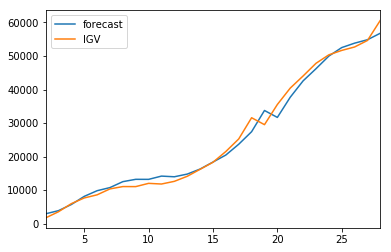

In [104]:
ajuste.plot_predict()
plt.show()

In [124]:
# Forecast
pred_punt, ee, pred_int = ajuste.forecast(2, alpha=0.05)  # 95% conf

#horizonte 2: para los dos siguientes periodos
#metodo forecast

In [113]:
pred_punt

array([62828.83654745, 64991.5838901 ])

In [122]:
ee

array([1936.03709281, 2737.96991391])

In [101]:
pred_int

array([[59034.27357281, 66623.3995221 ],
       [59625.26146808, 70357.90631212]])

In [125]:
import numpy as np
serie_observ  = pd.Series(np.array(datos.IGV), index = list(range(1990, 2019)))
predic_series = pd.Series(pred_punt, index= list(range(2019, 2021)))
liminf_series = pd.Series(pred_int[:, 0], index= list(range(2019, 2021)))
limsup_series = pd.Series(pred_int[:, 1], index= list(range(2019, 2021)))

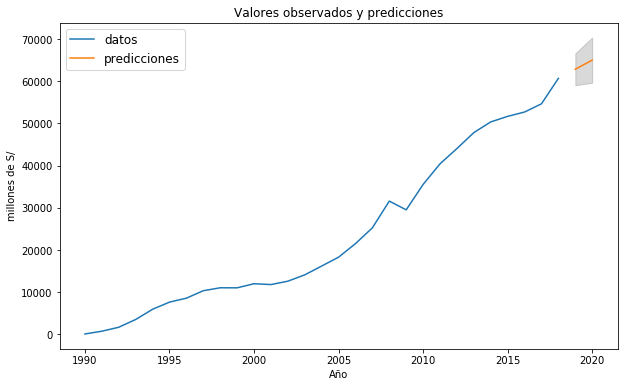

In [126]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(serie_observ, label='datos')
plt.plot(predic_series, label='predicciones')
plt.fill_between(liminf_series.index, liminf_series, limsup_series, 
                 color='k', alpha=.15)
plt.title('Valores observados y predicciones')
plt.ylabel('millones de S/')
plt.xlabel('Año')
plt.legend(loc='upper left', fontsize=12)